In [1]:
#affichage des résultats de calibration. Prédictions et densités à posteriori.
#Prédictions Ravik.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

         x          y  incx      incy
0   1.0606   631900.0   0.5   30160.1
1  17.4747   951700.0   0.5   43368.6
2  21.4646  1384500.0   0.5   64505.3
3  22.2222  1665200.0   0.5   70259.9
4  23.0303  1990700.0   0.5   77118.9
5  25.7576  2194100.0   0.5  106433.0
6  26.2121  2449400.0   0.5  112339.0
7  28.3838  2767900.0   0.5  145115.0
8  28.4343  3342700.0   0.5  145972.0
9  29.5960  3067700.0   0.5  166968.0


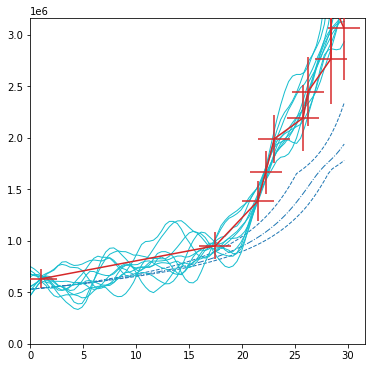

In [182]:
#afficher des prédictions.
cfb='tab:blue'
lw2=1
lw1=1
foldname='NIGP/results/'
obs=pd.DataFrame(data=np.loadtxt(foldname+'obs23.gnu'),columns=['x','y','incx','incy'])
p=pd.DataFrame(data=np.loadtxt(foldname+"preds/predsoptwF23.gnu"),columns=['x','useless','q25','q75','q2p5','q97p5','fmean'])


pFZ=pd.DataFrame(data=np.loadtxt(foldname+"preds/predsoptw23.gnu"),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])

fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
axs.plot(p['x'],p['useless'],linewidth=lw2,linestyle='-.',color=cfb,label=r'$f(x,\theta_{\mathrm{pmean}})$')

axs.plot(p['x'],p['q97p5'],linewidth=lw1,linestyle='--',color=cfb,label=r'95$\%$ credence interval')


axs.plot(p['x'],p['q2p5'],linewidth=lw1,linestyle='--',color=cfb)

ls=['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10']
#ls=['s5']
for s in ls:
    axs.plot(pFZ['x'],pFZ[s],linewidth=lw1,color='tab:cyan')
    
axs.errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],color='tab:red',label='observations',zorder=100)

axs.set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs.set_ylim([0,obs['y'][len(obs['y'])-1]+1e5])
print(obs)


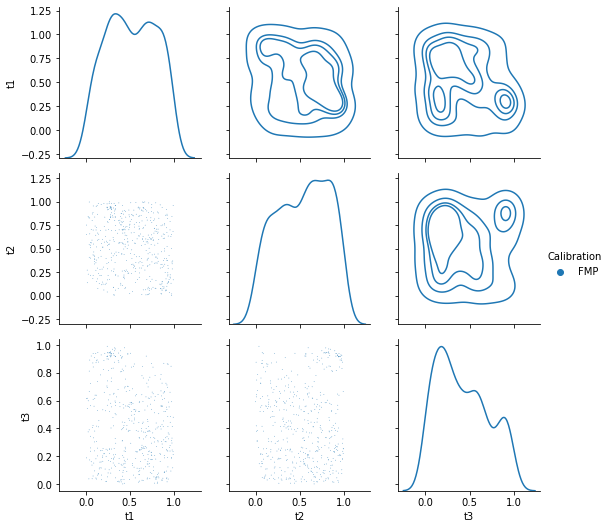

In [110]:

#plots seaborn
foldname='NIGP/results/'
dfopt=pd.DataFrame(data=np.loadtxt(foldname+"save/sampopt22.gnu")[:,:3],columns=['t1','t2','t3'])
#dffb=pd.DataFrame(data=np.loadtxt(foldname+"save/sampfb23.gnu")[:,:3],columns=['t1','t2','t3'])#on met le dfkoh non constant pour pouvoir faire un histogramme..
#dfkohp=pd.DataFrame(data=np.loadtxt(foldname+"save/sampkohp23.gnu")[:,:3],columns=['t1','t2','t3'])
#dfkohs=pd.DataFrame(data=np.loadtxt(foldname+"save/sampkohs23.gnu")[:,:3],columns=['t1','t2','t3'])


#on marque les données KOH et OPT
dfopt['Calibration']='FMP'
dffb['Calibration']='Bayes'
dfkohs['Calibration']='KOH separate'
dfkohp['Calibration']='KOH pooled'

df=pd.concat([dfopt,dfkohs,dfkohp],ignore_index=True)
df=pd.concat([dfopt],ignore_index=True)


#dfh=df[[strsigma1,strsobs1,strl1,'Calibration']] #dataframe contient les hyperparamètres
dfp=df[['t1','t2','t3','Calibration']]






g = sns.PairGrid(dfp,hue='Calibration',diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_upper(sns.kdeplot,levels=5)
g.map_lower(sns.scatterplot,s=0.5)
g.add_legend()






(0.0, 3167700.0)

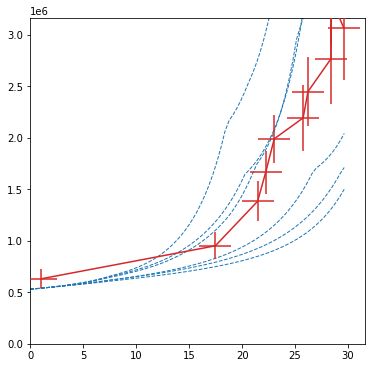

In [75]:
#plots des OAT
cfb='tab:blue'
lw2=1
lw1=1
foldname='NIGP/results/'
foldname1='OAT/results/'
case=23
obs=pd.DataFrame(data=np.loadtxt(foldname+'obs'+str(case)+'.gnu'),columns=['x','y','incx','incy'])
l=[]
labels=['c0+','c0-','c1+','c1-','c2+','c2-','c3+','c3-','c4+','c4-','c5+','c5-']
labels2=['c0+','c0-','c1+','c1-','c3+','c3-']
for lab in labels2:
    p=pd.DataFrame(data=np.loadtxt(foldname1+lab+str(case)+'.gnu'),columns=['x','pred'])
    l.append(p)
    
fig,axs=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
axs.errorbar(obs['x'],obs['y'],yerr=3*obs['incy'],xerr=3*obs['incx'],color='tab:red',label='observations',zorder=100)

for lb,lab in zip(l,labels2):
    axs.plot(lb['x'],lb['pred'],linewidth=lw1,linestyle='--',color=cfb,label=lab)
    
axs.set_xlim([0,obs['x'][len(obs['x'])-1]+2])
axs.set_ylim([0,obs['y'][len(obs['y'])-1]+1e5])


In [245]:
#il sera peut-être plus simple de faire une MCMC en python car je bénéficie de l'implémentation des KDE via scipy. et ensuite je récupère le sample dans un fichier et hopela.
#on récupère les samples et on construit les kde
foldname='NIGP/results/save/'
cases=['3','4','5','6','14','15','16','18','20','21','22','23']
#cases=['3']
filenames=[foldname+'sampkohs'+lab+'.gnu' for lab in cases]
dfs=[pd.DataFrame(data=np.loadtxt(x)[:,:3],columns=['t1','t2','t3']) for x in filenames]
#print(dfs)
kdes=[stats.gaussian_kde(df.transpose()) for df in dfs]
#attention c'est bien le log qu'on utilise pour la mcmc.
def compute_score(x):
    #print([np.log(kde.evaluate(x)+1e-13) for kde in kdes])
    return sum([np.log(kde.evaluate(x)+1e-15) for kde in kdes])
compute_score([0.5,0.5,0.9])








array([-328.61051792])

In [247]:
#Metropolis-Hastings

# Metropolis Hastings sampling from the posterior distribution

Nsteps = int(1e6)
Nburn = int(1e5)
Nsamples = 500
f = Nsteps/Nsamples
naccept=0

xinit = 0.5*np.ones((3))
covinit = np.eye(3)*0.05**2

burns= []
samples = []

#burn phase
x = xinit
s = compute_score(xinit)
for i in range(Nburn):
    xn = np.random.multivariate_normal(x,covinit)
    sn = compute_score(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    burns.append(x)
print('accept rate burn phase : '+str(100*((1.0*naccept)/Nburn)))
naccept=0
#calcul de la matrice de covariance
burns=np.array(burns)
print(burns)

cov=((2.38**2)/3)*np.cov(np.array(burns).transpose())
print('new cov matrix : ')
print(cov)
#sampling phase

for i in range(Nsteps):
    xn = np.random.multivariate_normal(x,cov)
    sn = compute_score(xn)
    if sn-s>np.log(np.random.rand()):
        naccept+=1
        x = xn
        s = sn
    if i % f == 0:
        samples.append(x)

samples = np.array(samples)

print('final accept rate: '+str(100*((1.0*naccept)/Nsteps)))
print('samples :')
print(len(samples))
print(samples)

accept rate burn phase : 30.786
[[0.49829958 0.52502353 0.46177146]
 [0.5182014  0.51389819 0.42285906]
 [0.5182014  0.51389819 0.42285906]
 ...
 [0.58937772 0.51611876 0.17843522]
 [0.60006825 0.495967   0.14392279]
 [0.60006825 0.495967   0.14392279]]
new cov matrix : 
[[ 0.02901094 -0.01651242 -0.00643539]
 [-0.01651242  0.04645239 -0.01184106]
 [-0.00643539 -0.01184106  0.0086684 ]]
final accept rate: 28.3059
samples :
500
[[0.60006825 0.495967   0.14392279]
 [0.48659831 0.59360896 0.17373029]
 [0.30865404 0.80151496 0.17141093]
 ...
 [0.5104507  0.32588581 0.25766873]
 [0.66974457 0.50852488 0.1039368 ]
 [0.70075633 0.23229969 0.22964627]]


In [248]:
#maintenant il faut voir ce que ces samples donnent après calibration.
#écriture des samples dans un fichier.
sampkohs15=samples
np.savetxt("samples.gnu", samples, delimiter=" ")
print(sampkohs)
#sampopt=samples

[[0.60043392 0.90088    0.31510363]
 [0.59450433 0.92339169 0.30977974]
 [0.58424757 0.91963798 0.31483502]
 ...
 [0.58739121 0.94173244 0.30680441]
 [0.58956604 0.94596386 0.30076284]
 [0.59937748 0.96227708 0.29068499]]


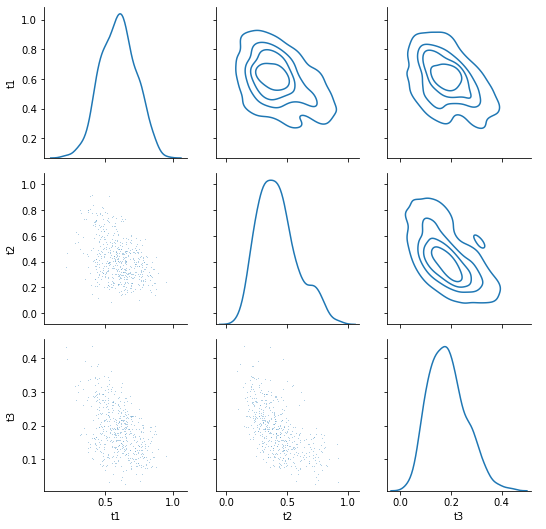

In [249]:
#plot des échantillons
df=pd.DataFrame(data=samples,columns=['t1','t2','t3'])
g = sns.PairGrid(df,diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_upper(sns.kdeplot,levels=5)
g.map_lower(sns.scatterplot,s=0.5)
g.add_legend()

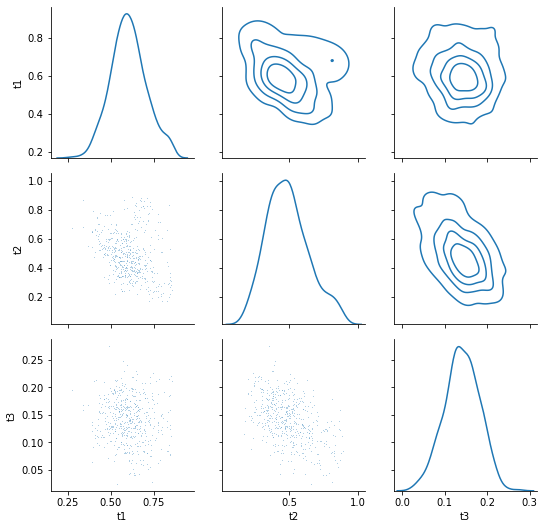

In [250]:
#plot des échantillons
df=pd.DataFrame(data=sampopt,columns=['t1','t2','t3'])
g = sns.PairGrid(df,diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_upper(sns.kdeplot,levels=5)
g.map_lower(sns.scatterplot,s=0.5)
g.add_legend()

In [97]:
allsamp=np.loadtxt(foldname+"save/sampopt16.gnu")[:,0:3]
allsamp=pd.DataFrame(data=allsamp,columns=['t1','t2','t3'])
#allsampkoh=np.loadtxt(foldname+'save/sampleskoh.gnu')[:,0:3]
#allsampkoh=pd.DataFrame(data=allsampkoh,columns=['t1','t2','t3'])
#allsampkohsep=np.loadtxt(foldname+'save/sampleskohsep.gnu')[:,0:3]
#allsampkohsep=pd.DataFrame(data=allsampkohsep,columns=['t1','t2','t3'])

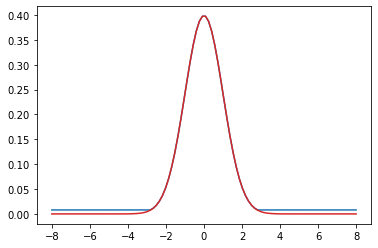

In [23]:
#quel facteur de réduction pour une gaussienne ?
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma-5, mu + 3*sigma+5, 100)
a=np.ones(100)*0.4/50
#print(a)
xp = np.maximum(stats.norm.pdf(x, mu, sigma),a)
#print(xp)
plt.plot(x, xp,color='tab:blue')
plt.plot(x, stats.norm.pdf(x, mu, sigma),color='tab:red')
plt.show()

           t1        t2        t3
0    0.680332  0.947342  0.231743
1    0.690117  0.966750  0.202581
2    0.678066  0.992082  0.205222
3    0.681523  0.929657  0.226846
4    0.673670  0.983469  0.203493
..        ...       ...       ...
194  0.697821  0.917741  0.226471
195  0.691340  0.980882  0.205571
196  0.756981  0.651295  0.312752
197  0.659566  0.988346  0.217692
198  0.668297  0.986226  0.210900

[199 rows x 3 columns]


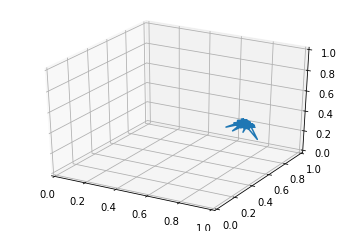

In [58]:
si p/pmax<20
log p < log pmax - log 20

In [21]:
np.log(50)

3.912023005428146

<Figure size 432x432 with 0 Axes>

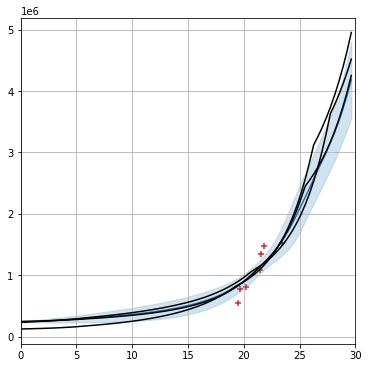

<Figure size 432x432 with 0 Axes>

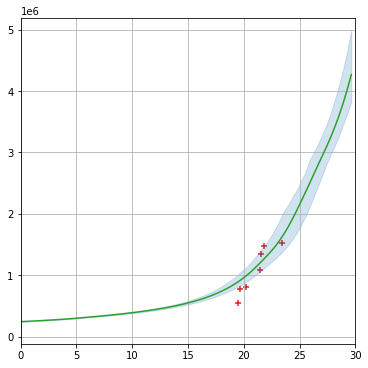

In [366]:
#fonctions pour afficher une prédiction et les observations correspondantes.

def show_preds(predfile,obsfile,xlim,ylim):
    obs=pd.DataFrame(data=np.loadtxt(obsfile),columns=['x','y'])
    pred=pd.DataFrame(data=np.loadtxt(predfile),columns=['x','ymean','q25','q75','q2p5','q97p5','ymap'])#pas sûr que ymap soit en dernière poisition ou en seconde.
    plt.figure(figsize=(6,6))
    fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
    ax1.scatter(obs['x'],obs['y'],marker='+',color='tab:red')
    ax1.plot(pred['x'],pred['ymean'],color='tab:green')
    ax1.fill_between(pred['x'],pred['q2p5'],pred['q97p5'],color='tab:blue',alpha=0.2)
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    plt.grid()
    plt.show()
    
def show_predsFZ(predfile,obsfile,xlim):
    obs=pd.DataFrame(data=np.loadtxt(obsfile),columns=['x','y'])
    pred=pd.DataFrame(data=np.loadtxt(predfile),columns=['x','mean','std','stdz','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'])#pas sûr que ymap soit en dernière poisition ou en seconde.
    plt.figure(figsize=(6,6))
    fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
    ax1.scatter(obs['x'],obs['y'],marker='+',color='tab:red')
    ax1.fill_between(pred['x'],pred['mean']-3*pred['std'],pred['mean']+3*pred['std'],color='tab:blue',alpha=0.2)
    ax1.plot(pred['x'],pred['mean'],color='tab:blue')
    ax1.plot(pred['x'],pred['s1'],color='black')
    ax1.plot(pred['x'],pred['s2'],color='black')
    ax1.plot(pred['x'],pred['s3'],color='black')
    
    ax1.set_xlim(xlim)
    ylim=ax1.get_ylim()
    plt.grid()
    plt.show()
    return ylim

xlim=[0,30]
#correspondances : cases={3,4,5,6,14,15,16,18,20,21,22,23};
predname=foldname+'preds/predopt0.gnu'
predname2=foldname+'preds/predoptF0.gnu'
obsname=foldname+'obs14.gnu'
ylim=show_predsFZ(predname,obsname,xlim)
show_preds(predname2,obsname,xlim,ylim)


